In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

In [20]:
data = pd.read_csv('/home/maksonvinicio/Documents/GitHub/Datathon-BRK/Data/all_data.csv')
lat_long = pd.read_excel('/home/maksonvinicio/Documents/GitHub/Datathon-BRK/Data/lat_long.xlsx')

In [11]:
# tam = []
# data['lat'] = 0
# data['lng'] = 0
# for nome in data['Município']:
#     for nome_lat in lat_long['NOME MUNICIPIO']:
#         if nome_lat in nome:
#             data.loc[data['Município'] == nome, 'lat'] = lat_long.loc[lat_long['NOME MUNICIPIO'] == nome_lat, 'LATITUDE'].values[0]
#             data.loc[data['Município'] == nome, 'lng'] = lat_long.loc[lat_long['NOME MUNICIPIO'] == nome_lat, 'LONGITUDE'].values[0]


In [21]:
data.head(2)

,Ano,Município,Parcela_das_moradias_sem_banheiro_de_uso_exclusivo,Parcela_da_população_que_não_recebe_água_com_regularidade_adequada,Parcela_da_população_total_que_mora_em_domicílios_sem_acesso_à_água_tratada,Volume_de_água_consumida_per_capita,Volume_de_esgoto_coletado,Volume_de_esgoto_tratado,Volume_de_esgoto_não_tratado,Tarifa_média_de_água,Tarifa_média_de_coleta_de_esgoto,Tarifa_média_ponderada_dos_serviços_de_saneamento,Custo_total_dos_operadores_com_os_serviços_de_saneamento,Custo_total_dos_operadores_com_produtos_químicos,Custo_total_dos_operadores_com_energia_elétrica,Internações_por_doenças_associadas_à_falta_de_saneamento,Taxa_de_incidência_de_internações_por_doenças_associadas_à_falta_de_saneamento,Atraso_escolar_das_pessoas_que_moram_em_residências_com_saneamento_básico,Atraso_escolar_das_pessoas_que_moram_em_residências_sem_saneamento,Investimentos_per_capita_em_saneamento,Renda_induzida_gerada_pelas_operação_de_saneamento,Renda_total_gerada_pelas_operação_de_saneamento,Redução_dos_custos_com_a_saúde,lat,lng
0,2010,Colatina (Município),0.01,NaN,0.09,153.52,4685.00,292.00,5972.00,1.56,0.92,1.29,9646578.55,368893.96,3106555.69,265.00,23.71,4.61,5.29,200.53,11667741.55,39002256.74,NaN,-19.53,-40.63
1,2010,Parintins (Município),0.38,NaN,0.17,143.73,0.00,0.00,5352.75,0.39,0.00,0.39,2136068.87,5306.00,186553.33,265.00,25.97,2.50,5.43,1.83,1429901.77,4779793.57,NaN,-2.62,-56.73


In [22]:
for cols in data.columns[2::]:
    data[cols] = data[cols].astype(str)
    data[cols] = data[cols].replace('-', np.nan)
    data[cols] = data[cols].astype(float)

In [23]:
filter = ((data['Ano'] == 2019) & (data['Parcela_da_população_total_que_mora_em_domicílios_sem_acesso_à_água_tratada'] >= 0.184) 
        & (data['Taxa_de_incidência_de_internações_por_doenças_associadas_à_falta_de_saneamento'] >= 13.87) 
        & (data['Investimentos_per_capita_em_saneamento'] <= 25.94)) # Valor da mediana

In [36]:
data[filter].head(2)

,Ano,Município,Parcela_das_moradias_sem_banheiro_de_uso_exclusivo,Parcela_da_população_que_não_recebe_água_com_regularidade_adequada,Parcela_da_população_total_que_mora_em_domicílios_sem_acesso_à_água_tratada,Volume_de_água_consumida_per_capita,Volume_de_esgoto_coletado,Volume_de_esgoto_tratado,Volume_de_esgoto_não_tratado,Tarifa_média_de_água,Tarifa_média_de_coleta_de_esgoto,Tarifa_média_ponderada_dos_serviços_de_saneamento,Custo_total_dos_operadores_com_os_serviços_de_saneamento,Custo_total_dos_operadores_com_produtos_químicos,Custo_total_dos_operadores_com_energia_elétrica,Internações_por_doenças_associadas_à_falta_de_saneamento,Taxa_de_incidência_de_internações_por_doenças_associadas_à_falta_de_saneamento,Atraso_escolar_das_pessoas_que_moram_em_residências_com_saneamento_básico,Atraso_escolar_das_pessoas_que_moram_em_residências_sem_saneamento,Investimentos_per_capita_em_saneamento,Renda_induzida_gerada_pelas_operação_de_saneamento,Renda_total_gerada_pelas_operação_de_saneamento,Redução_dos_custos_com_a_saúde,lat,lng
7600,2019,Cacoal (Município),0.00,NaN,0.21,145.08,1777.47,1777.47,2742.50,2.46,2.49,2.47,17095886.62,509754.00,2773099.62,206.00,24.13,1.30,3.42,0.00,7053108.18,23576725.19,NaN,-11.43,-61.44
7609,2019,Canindé (Município),0.07,NaN,0.32,65.86,404.00,404.00,1447.00,1.69,1.20,1.62,4506713.57,91461.40,722542.31,119.00,15.46,1.27,1.79,0.12,1951298.12,6522687.37,NaN,-4.35,-39.31


In [39]:
data['Município'].unique().tolist()

['Colatina (Município)',
 'Parintins (Município)',
 'Mineiros (Município)',
 'Nova Friburgo (Município)',
 'Cachoeirinha (Município)',
 'Coivaras (Município)',
 'Humaitá (Município)',
 'Leme (Município)',
 'Novo Hamburgo (Município)',
 'Tomé-Açu (Município)',
 'Alvorada (Município)',
 'Quatro Barras (Município)',
 'Tramandaí (Município)',
 'Caucaia (Município)',
 'São José da Lapa (Município)',
 'Pinheiro (Município)',
 'Ipixuna do Pará (Município)',
 'Bonfinópolis (Município)',
 'Trairi (Município)',
 'Uberaba (Município)',
 'Assis (Município)',
 'Tefé (Município)',
 'Pedras de Fogo (Município)',
 'Erechim (Município)',
 'Mateus Leme (Município)',
 'Resende (Município)',
 'Brumado (Município)',
 'Hidrolândia (Município)',
 'Catu (Município)',
 'Óbidos (Município)',
 'Mogi das Cruzes (Município)',
 'Araraquara (Município)',
 'Pacatuba (Município)',
 'Açailândia (Município)',
 'Caçapava (Município)',
 'Brumadinho (Município)',
 'Porto Feliz (Município)',
 'Nova Iguaçu (Município)',
 'Ro

In [35]:
fig = px.scatter_mapbox(data, lat="lat", lon="lng", size='Investimentos_per_capita_em_saneamento', hover_name="Município",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [160]:
data['Ano'].values

array([2010, 2010, 2010, ..., 2019, 2019, 2019])

<AxesSubplot:xlabel='Ano', ylabel='Parcela_da_população_total_que_mora_em_domicílios_sem_acesso_à_água_tratada'>

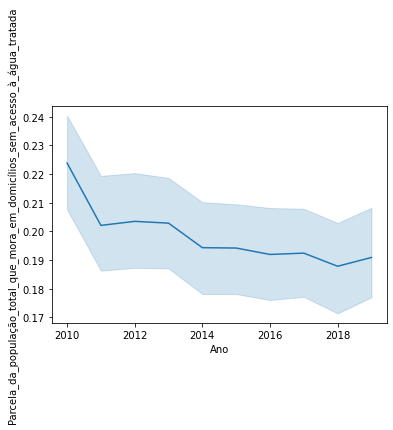

In [190]:
sns.lineplot(x='Ano', y='Parcela_da_população_total_que_mora_em_domicílios_sem_acesso_à_água_tratada', data=data)